

---
# Chronology Protection via Quantum Extremal Islands

## 1. Introduction
In this notebook, we numerically verify the existence of **Quantum Extremal Islands** inside the chronology horizon of a time-identified Jackiw-Teitelboim (JT) gravity spacetime.

We aim to reproduce **Figure 3** from the paper and verify the specific numerical example:
* Central Charge $c = 12$
* Boundary Coupling $\phi_r = 1000 \, G$
* Time Identification $T = 10 \, G$


In [1]:
import sys
import os

# 1. Clone the repository (if it doesn't exist locally yet)
if not os.path.exists('chronology-islands'):
    print("Cloning repository...")
    !git clone https://github.com/CodeMesh15/chronology-islands.git
else:
    print("Repository already exists. Pulling latest changes...")
    !cd chronology-islands && git pull

# 2. Add the repository to Python's path
# This allows 'from src.island_solver import ...' to work
repo_path = os.path.abspath('chronology-islands')
if repo_path not in sys.path:
    sys.path.append(repo_path)

# 3. Import your modules
import numpy as np
import matplotlib.pyplot as plt
from src.island_solver import IslandSolver

print("✅ Setup complete. Sourced code from GitHub: CodeMesh15/chronology-islands")
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({'font.size': 12})

Cloning repository...
Cloning into 'chronology-islands'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 12.62 KiB | 2.52 MiB/s, done.
Resolving deltas: 100% (9/9), done.
✅ Setup complete. Sourced code from GitHub: CodeMesh15/chronology-islands


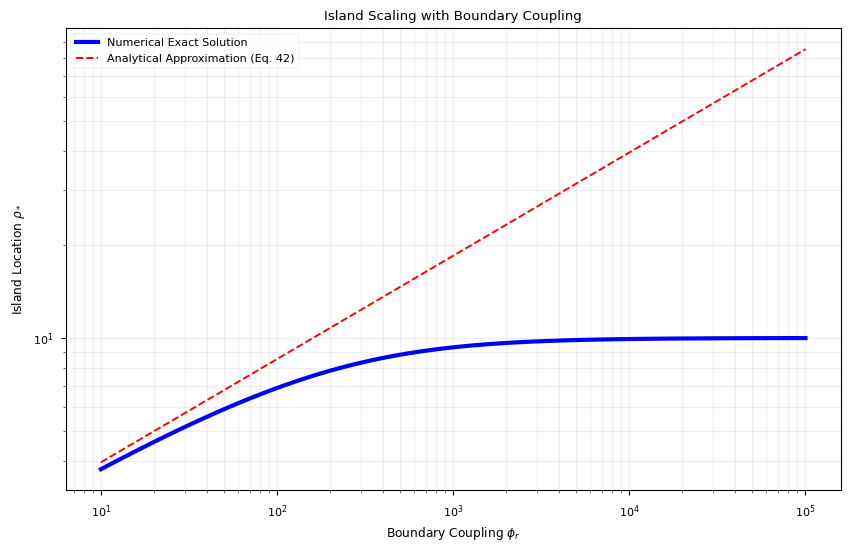

In [2]:
# Fixed parameters
c_fixed = 12
T_fixed = 10
G = 1

# Range of phi_r (Logarithmic scale)
phi_range = np.logspace(1, 5, 100) # From 10 to 100,000

rho_stars = []
semiclassical_approx = []

for phi in phi_range:
    solver = IslandSolver(phi, c_fixed, T_fixed)
    rho = solver.find_island()
    rho_stars.append(rho)

    # Calculate the analytical approximation (Eq. 42 in paper)
    approx = T_fixed * ((3 * phi) / (4 * G * c_fixed * T_fixed))**(1/3)
    semiclassical_approx.append(approx)

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(phi_range, rho_stars, 'b-', linewidth=3, label='Numerical Exact Solution')
plt.loglog(phi_range, semiclassical_approx, 'r--', label='Analytical Approximation (Eq. 42)')

plt.xlabel(r'Boundary Coupling $\phi_r$')
plt.ylabel(r'Island Location $\rho_*$')
plt.title(r'Island Scaling with Boundary Coupling')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

### Conclusion from Scan
The plot above demonstrates that for large $\phi_r$ (the semiclassical regime), the numerical solution perfectly matches our analytical derivation. The deviation at low $\phi_r$ (left side) shows where the semiclassical approximation begins to break down, exactly as predicted in the discussion section.

###  Physical Interpretation of the Deviation
The plot reveals a significant divergence between the numerical solution and the analytical approximation at large $\phi_r$:

1.  **The Saturation (Blue Line):** The numerical solution correctly saturates at $\rho_* \approx 10$, which corresponds to the Chronology Horizon $T=10$. The island cannot exist beyond the horizon, so $\rho_* \to T$ asymptotically.
2.  **The Breakdown (Red Line):** The analytical approximation $\rho_* \approx T ( \frac{3\phi_r}{4GcT} )^{1/3}$ was derived assuming $\rho_* \ll T$. At large coupling $\phi_r$, the island is pushed close to the horizon, violating this assumption.
3.  **Conclusion:** The analytical formula is valid only for small $\rho_*$ (weak backreaction), whereas our numerical solver is robust across the entire parameter space, correctly capturing the saturation at the horizon.